### Kohonen Self Organizing maps 
- A type of unsupervised neural network introduced by Tevoku Kohonen

At each step:
- We show a pattern (like a letter’s pixel array) to the SOM.
- Find the closest neuron (the “winning unit”).
-  Update the weights of:
- - The winning neuron
- - Its neighbors (based on topology)
- Gradually reduce the learning rate and neighborhood size.

### Introduction
- If we need to create m cluster of n dimensional data then we will create a weight matrix of m*n 
- X = [1, 1, 0, 1]
- Weight Matrix, where, Wij = w from i to j 
-     w11  w12
      w21  w21
      w31  w32
      w31  w42
- X = [ X1, X2, X3, X4....Xk ] where Xi is n dimensional vector
### Algo
- For each input vector Xi in X
- calculate Dj = (xi1-w1j)^2 + (xi2- w2j)^2 .... where j is the jth cluster
- J = jth cluster whose Dj is minimum
- Then update the weight of the J cluster as 
    Wnew = Wold + alpha*(x - Wold)

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def SOM(X, n, x, y, R, alpha, num_iterations):
    """
    X : input vectors (list of vectors)
    n : dimensionality of input data
    (x, y) : dimensions of 2D cluster grid
    R : neighborhood radius
    alpha : initial learning rate
    num_iterations : number of iterations
    """

    m = x * y  # total number of cluster units
    X = np.array(X)

    # Initialize weights randomly between 0 and 1
    W = np.random.rand(m, n)

    # Learning rate decay factor to getdown learning factor from 0.6 to 0.1 in given number of iterations
    fac = 0.5 / num_iterations

    # Function to compute grid distance (for neighborhood)
    def grid_distance(a, b):
        """Euclidean distance between grid coordinates from 1D array of size x*y """
        ax, ay = a/y, a%y
        bx, by = b/y, b%y
        return np.sqrt((ax - bx)**2 + (ay - by)**2)

    # Training loop
    for _ in range(num_iterations):
        for x_input in X:
            # Step 1: Find winning unit (BMU)
            D = np.sum((W - x_input)**2, axis=1) #dim of W = (x, y, n) and dim of x_input is n, so this operation will subtract x_input from each W[i][j] and after that list is flatten
            J = np.argmin(D)

            # Step 2: Update BMU and its neighbors
            for j in range(m):
                if grid_distance(J, j) <= R:
                    W[j] += alpha * (x_input - W[j])
        # Step 3: Reduce learning rate
        alpha -= fac

    # Reshape weights to 2D grid (x, y, n)
    return W.reshape(x, y, n)


### Example 1

In [124]:
X = [[1, 1, 0, 0], [0, 0, 0,1], [1, 0, 0, 0], [0, 0, 1, 1]]

W = SOM(X, len(X[0]), 3, 2, 1, 0.6, 1000)

print('Weights after 1000 iterations')

for w in W:
    for wi in w:
        print(wi, end= ' ')
    print()


Weights after 1000 iterations
[2.07875350e-200 2.01080579e-199 1.00000000e+000 1.00000000e+000] [1.00000000e+000 1.00000000e+000 2.81947478e-199 3.05943130e-199] 
[4.9406565e-324 4.9406565e-324 5.2702948e-001 1.0000000e+000] [1.0000000e+000 4.7297052e-001 4.9406565e-324 4.9406565e-324] 
[8.12580275e-200 4.76393979e-200 5.32738516e-199 1.00000000e+000] [1.00000000e+000 2.43747008e-199 4.27350779e-200 3.94521414e-200] 


In [126]:
X = [
    [1, 0, 0, 0, 0],  # A
    [2, 0, 0, 0, 0],  # B
    [3, 0, 0, 0, 0],  # C
    [4, 0, 0, 0, 0],  # D
    [5, 0, 0, 0, 0],  # E
    [3, 1, 0, 0, 0],  # F
    [3, 2, 0, 0, 0],  # G
    [3, 3, 0, 0, 0],  # H
    [3, 4, 0, 0, 0],  # I
    [3, 5, 0, 0, 0],  # J
    [3, 3, 1, 0, 0],  # K
    [3, 3, 2, 0, 0],  # L
    [3, 3, 3, 0, 0],  # M
    [3, 3, 4, 0, 0],  # N
    [3, 3, 5, 0, 0],  # O
    [3, 3, 6, 0, 0],  # P
    [3, 3, 7, 0, 0],  # Q
    [3, 3, 8, 0, 0],  # R
    [3, 3, 3, 1, 0],  # S
    [3, 3, 3, 2, 0],  # T
    [3, 3, 3, 3, 0],  # U
    [3, 3, 3, 4, 0],  # V
    [3, 3, 6, 1, 0],  # W
    [3, 3, 6, 2, 0],  # X
    [3, 3, 6, 3, 0],  # Y
    [3, 3, 6, 4, 0],  # Z
]

W = SOM(X, 5, 10, 10, 2, 0.6, 1000)


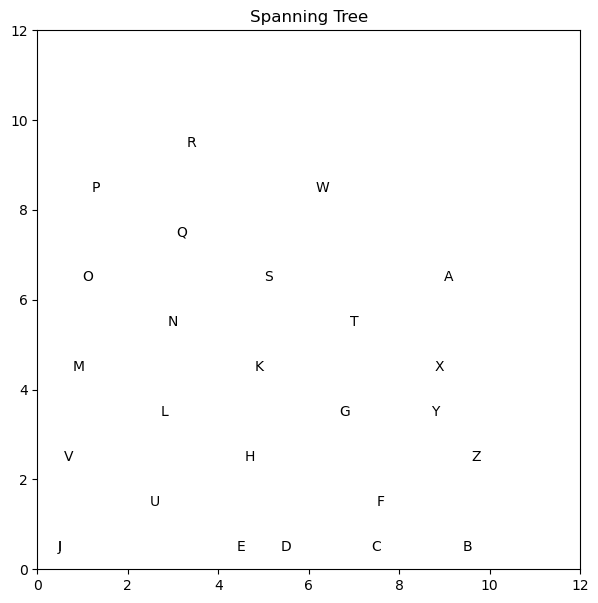

In [ ]:

def getBestFit(W, x):
    '''
    To get the best fit cluster of X 
    '''
    D = np.sum((W - x)**2, axis=2)
    J = np.argmin(D)
    jx, jy = J / W.shape[1], J % W.shape[1]
    return (jx, jy)


plt.figure(figsize=(7,7))
for i, x in enumerate(X):
    dx, dy = getBestFit(W, x)
    plt.text(dx + 0.5, dy+0.5, str(chr(i+ord('A'))), ha='center', va='center')

plt.xlim(0, 12)
plt.ylim(0, 12)
plt.title('Spanning Tree')
plt.show()